In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
calories=pd.read_csv('calories.csv')
exercises=pd.read_csv('exercise.csv')

In [4]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercises.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
calories_data=pd.concat([exercises,calories['Calories']],axis=1)

In [7]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
# check for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
calories_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [11]:
# check for duplicated rows in dataset
calories_data.duplicated().any()

False

<Figure size 500x300 with 0 Axes>

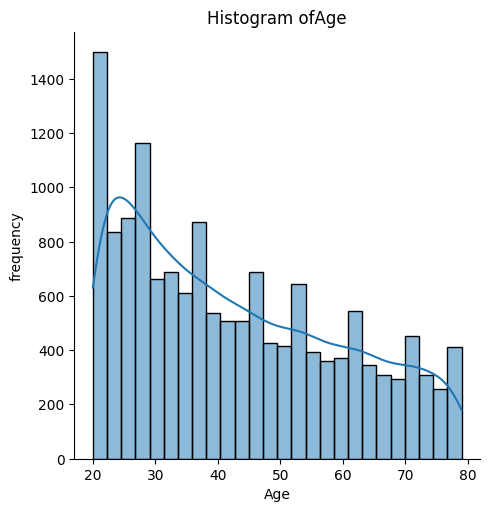

<Figure size 500x300 with 0 Axes>

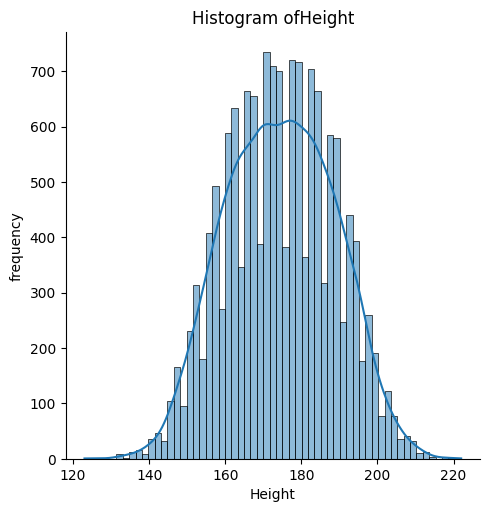

<Figure size 500x300 with 0 Axes>

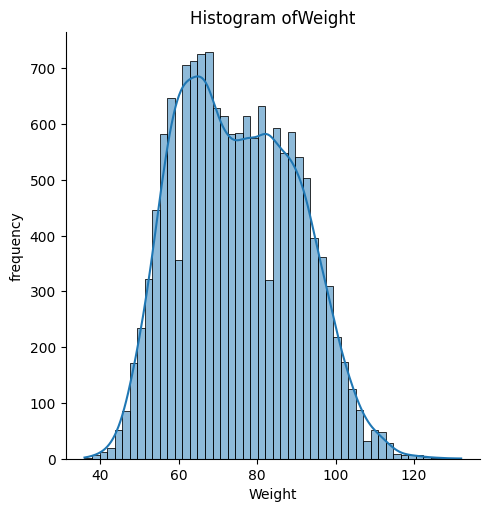

<Figure size 500x300 with 0 Axes>

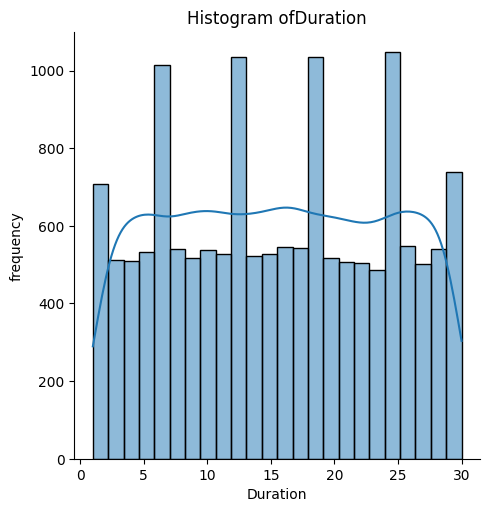

<Figure size 500x300 with 0 Axes>

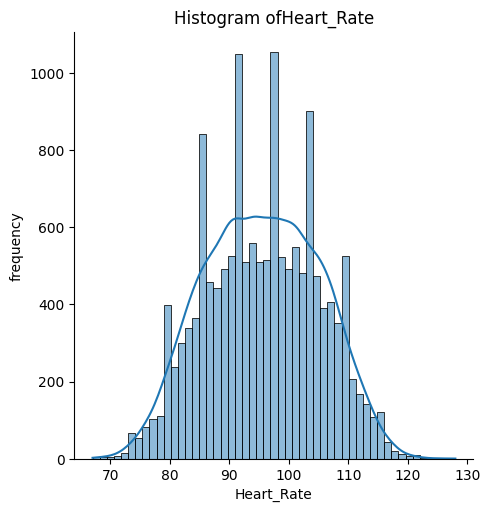

<Figure size 500x300 with 0 Axes>

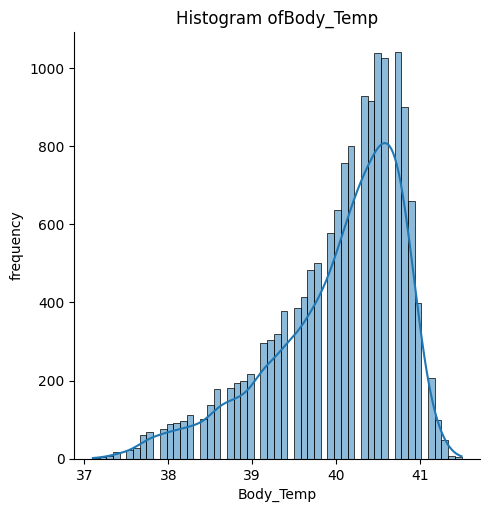

In [12]:
def plot_graph(data,features):
    for column in features:
        plt.figure(figsize=(5,3))
        sns.displot(data[column],kde=True)
        plt.title(f'Histogram of{column}')
        plt.xlabel(column)
        plt.ylabel('frequency')
        plt.show()
num_features=calories_data.select_dtypes(include=np.number).columns[1:-1].tolist()
plot_graph(calories_data,num_features)
        
    

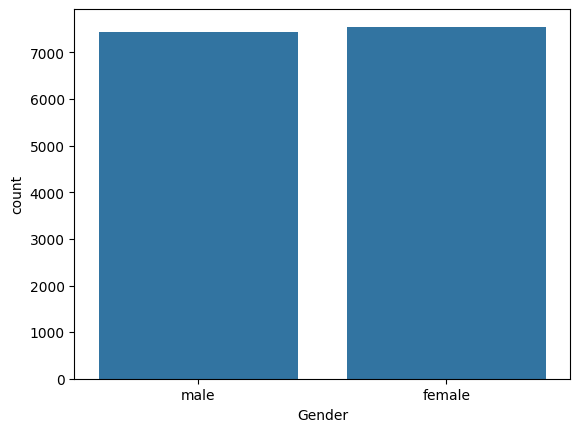

In [13]:
# sns.set()
sns.countplot(data=calories_data,x='Gender')
plt.show()

<Axes: >

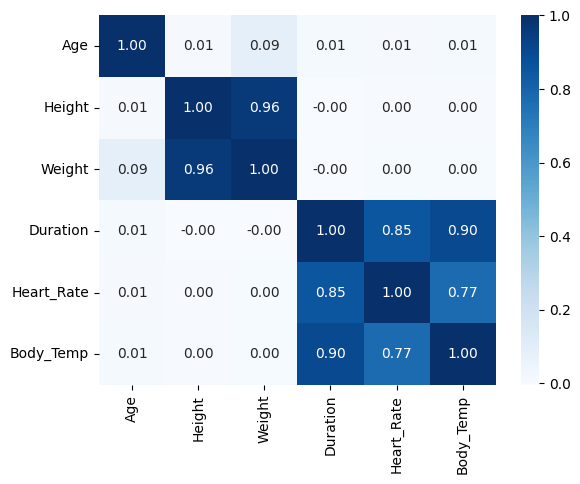

In [14]:
corr=calories_data[num_features].corr()
sns.heatmap(corr,annot=True,cbar=True,fmt='.2f',cmap='Blues')

In [15]:
encoder=LabelEncoder()
calories_data['Gender']=encoder.fit_transform(calories_data['Gender'])

In [16]:
X=calories_data.drop(['User_ID','Calories'],axis=1)
y=calories_data['Calories']

In [17]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8


In [18]:
scaler=StandardScaler()
standard_X=scaler.fit_transform(X)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12000, 7), (3000, 7), (12000,), (3000,))

In [21]:
# preprocessor=make_column_transformer((OneHotEncoder(),['Gender']),
#                                     (StandardScaler(),num_features))

In [22]:
# pipeline=Pipeline([('preprocessor',preprocessor),
#                  ('model',LinearRegression())])
# pipeline

In [23]:
# pipeline.fit(x_train,y_train)
# y_pred=pipeline.predict(x_test)
# score=r2_score(y_test,y_pred)
# mae=mean_absolute_error(y_test,y_pred)
# print(f'R2_score of Linear regreesion:{score}')
# print(f'MAE of Linear regreesion:{mae}')

In [24]:
def model_score(model_name,model):
    output=[]
    output.append(model_name)
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    output.append(r2_score(y_test,y_pred))
    output.append(mean_absolute_error(y_test,y_pred))
    return output

In [25]:
models={'linear Regression':LinearRegression(),
       'lasso':Lasso(),
       'ridge':Ridge(),
       'svr':SVR(),
       'RF':RandomForestRegressor(),
       'XGB':XGBRegressor()}

In [26]:
model_output=[]
for name,model in models.items():
    model_output.append(model_score(name,model))
    

In [27]:
model_output

[['linear Regression', 0.9672937151257295, 8.441513553849717],
 ['lasso', 0.9643621590908397, 8.86512110490948],
 ['ridge', 0.9672935879435945, 8.441411841419185],
 ['svr', 0.9368056262647513, 10.873950975137989],
 ['RF', 0.9981963945756658, 1.7260333333333335],
 ['XGB', 0.9988678909361673, 1.4981198125282924]]

In [28]:
model1= XGBRegressor()
xg_final=model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f'R2_score of  XGBRegressor:{score}')
print(f'MAE of  XGBRegressor:{mae}')

R2_score of  XGBRegressor:0.9988678909361673
MAE of  XGBRegressor:1.4981198125282924


In [29]:
joblib.dump(xg_final, "models.joblib")

['models.joblib']

In [30]:
# import pickle
# filename=' XGBRegressor.pkl'
# pickle.dump(model,open(filename,'wb'))

In [31]:
model=joblib.load("models.joblib")

In [32]:
# loaded_model=pickle.load(open('trained_model.sav','rb'))

In [33]:
xg_final.save_model('xg_models.json')